In [1]:
import numpy as np
from xlwt import Workbook
import pandas as pd
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook


def cost(intercept, coef, X, y):
    return np.mean((y - (intercept + coef*X)) ** 2)

xl = pd.ExcelFile('demo_data.xls')
df = pd.read_excel(xl, 0, header=0)
X = df['X'].to_numpy()
X = np.stack((np.ones(X.shape[0]), X), axis=0).T
y = np.expand_dims(df['y'].to_numpy(), axis=1)

In [7]:
eta = 0.7
n_iterations = 500
m = len(y)
theta = np.array([[6], [8]])

lines = [(theta[0], theta[1], cost(theta[0], theta[1], X[:,1], y[:,0]))]

for iteration in range(n_iterations):
    grad = 1/m *X.T.dot((X.dot(theta)) - y)
    theta = theta - eta * grad
    lines.append((theta[0], theta[1], cost(theta[0], theta[1], X[:,1], y[:,0])))
    
print('theta = ', theta)

theta =  [[4.1648496 ]
 [2.93275231]]


<IPython.core.display.Javascript object>


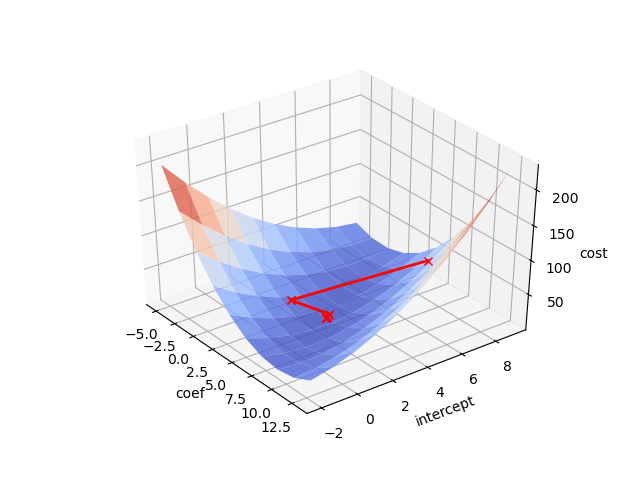

In [9]:
intercept, coef = theta

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

intercept_s = np.linspace(-5, 13, 10)
coef_s = np.linspace(-2, 9, 10)

INTERCEPT, COEF = np.meshgrid(intercept_s, coef_s)
cost_s = np.array([cost(intercept_p, coef_p, X[:,1], y[:,0]) for intercept_p, coef_p\
                   in zip(np.ravel(INTERCEPT), np.ravel(COEF))])
COST = cost_s.reshape(INTERCEPT.shape)

ax.plot_surface(INTERCEPT, COEF, COST, rstride=1, cstride=1, cmap=cm.coolwarm, alpha=0.8, linewidth=0)


ax.plot((lines[0][0], lines[1][0]),\
        (lines[0][1], lines[1][1]),\
        (lines[0][2], lines[1][2]),\
        'rx-', linewidth=2, zorder=100)
p_i = 1
for i in range(2, len(lines) - 1):
    if (i % 10) == 0:
        ax.plot((lines[p_i][0], lines[i][0]),\
                (lines[p_i][1], lines[i][1]),\
                (lines[p_i][2], lines[i][2]),\
                'rx-', linewidth=2, zorder=100)
        p_i = i + 1


ax.set_ylabel('intercept')
ax.set_xlabel('coef')
ax.set_zlabel('cost')

plt.show()